**Image Extraction**

In [6]:
import fitz
import re

pdf_document = "C:/Users/LENOVO/Downloads/practice-standard-project-risk-management.pdf"
doc = fitz.open(pdf_document)
image_count = 0
section_pattern = re.compile(r'\b\d+\.\d+\b')  # Regex to find section numbers like '1.1', '2.1'

def find_section(page_text):
    """Extract the most recent section number from the page text."""
    sections = section_pattern.findall(page_text)
    if sections:
        return sections[-1]  # Return the last found section number
    return None  # No section found on the page

# Initialize a variable to store the current section (will carry over to subsequent pages)
current_section = None

for page_num in range(doc.page_count):
    page = doc.load_page(page_num)

    # Extract text from the page
    page_text = page.get_text("text")
    
    # Find the section number from the text
    new_section = find_section(page_text)
    
    # If a new section is found, update the current_section
    if new_section:
        current_section = new_section

    # If no section has been found so far, use a fallback
    if current_section is None:
        current_section = f"no_section_page_{page_num}"  # Fallback if no section found yet

    for img in page.get_images(full=True):
        # XREF
        xref = img[0]

        # Bytes
        base_image = doc.extract_image(xref)
        image_bytes = base_image["image"]

        # Extension
        image_ext = base_image["ext"]

        # Save the image using the current section number
        image_filename = f'C:/PI_AI/PRM-Ai-cognition/images/image_{current_section}.{image_ext}'
        with open(image_filename, 'wb') as img_file:
            img_file.write(image_bytes)

        print(f"Image saved as: {image_filename}")
        image_count += 1


Image saved as: C:/PI_AI/PRM-Ai-cognition/images/image_1.1.png
Image saved as: C:/PI_AI/PRM-Ai-cognition/images/image_1.5.png
Image saved as: C:/PI_AI/PRM-Ai-cognition/images/image_3.2.png
Image saved as: C:/PI_AI/PRM-Ai-cognition/images/image_4.4.png
Image saved as: C:/PI_AI/PRM-Ai-cognition/images/image_5.3.png
Image saved as: C:/PI_AI/PRM-Ai-cognition/images/image_5.4.png
Image saved as: C:/PI_AI/PRM-Ai-cognition/images/image_6.2.png
Image saved as: C:/PI_AI/PRM-Ai-cognition/images/image_6.3.png
Image saved as: C:/PI_AI/PRM-Ai-cognition/images/image_7.2.png
Image saved as: C:/PI_AI/PRM-Ai-cognition/images/image_7.3.png
Image saved as: C:/PI_AI/PRM-Ai-cognition/images/image_8.2.png
Image saved as: C:/PI_AI/PRM-Ai-cognition/images/image_8.4.png
Image saved as: C:/PI_AI/PRM-Ai-cognition/images/image_9.2.png
Image saved as: C:/PI_AI/PRM-Ai-cognition/images/image_2.1.png
Image saved as: C:/PI_AI/PRM-Ai-cognition/images/image_2.1.png
Image saved as: C:/PI_AI/PRM-Ai-cognition/images/image_

In [4]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib


In [7]:
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
import os

# If modifying these SCOPES, delete the file token.json.
SCOPES = ['https://www.googleapis.com/auth/drive.file']

def authenticate_drive():
    creds = None
    # The file token.json stores the user's access and refresh tokens, and is created automatically when the authorization flow completes for the first time.
    if os.path.exists('token.json'):
        creds = Credentials.from_authorized_user_file('token.json', SCOPES)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file('C:/PI_AI/PRM-Ai-cognition/client_secret_929498173938-n2tgah50inibuul4l53lis6bhrbp8g85.apps.googleusercontent.com.json', SCOPES)
            creds = flow.run_local_server(port=0)
        # Save the credentials for the next run
        with open('token.json', 'w') as token:
            token.write(creds.to_json())
    return build('drive', 'v3', credentials=creds)

def upload_to_drive(file_path):
    drive_service = authenticate_drive()
    file_metadata = {'name': os.path.basename(file_path)}
    media = MediaFileUpload(file_path, mimetype='image/jpeg')
    file = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()
    file_id = file.get('id')
    
    # Make the file publicly accessible
    drive_service.permissions().create(
        fileId=file_id,
        body={'type': 'anyone', 'role': 'reader'},
    ).execute()

    # Get the shareable link
    return f"https://drive.google.com/file/d/{file_id}/view?usp=sharing"

# Example usage
image_folder = 'C:/PI_AI/PRM-Ai-cognition/images'
image_files = []  # Add your image filenames here
for filename in os.listdir(image_folder):
  full_path = os.path.join(image_folder, filename)
  image_files.append(full_path)
for image in image_files:
    file_name = os.path.basename(image)
    link = upload_to_drive(image)
    link = link+f"&file_name={file_name}"
    print(f"Image uploaded and accessible at: {link}")


Image uploaded and accessible at: https://drive.google.com/file/d/1i_d6BSH8nlby2MpCQQOSQJnhrVwQcLw4/view?usp=sharing&file_name=image_1.1.png
Image uploaded and accessible at: https://drive.google.com/file/d/1FOVkV5O4xa-1hN1CpbdePO_A0DqZhnvd/view?usp=sharing&file_name=image_1.5.png
Image uploaded and accessible at: https://drive.google.com/file/d/1K-jq5GfxXHDQCkZLoiMrGRHc3f17sD2I/view?usp=sharing&file_name=image_2.1.png
Image uploaded and accessible at: https://drive.google.com/file/d/1C9vhUoM9IuZgTRtUWj4sZP9BoI1rbhU6/view?usp=sharing&file_name=image_3.1.png
Image uploaded and accessible at: https://drive.google.com/file/d/1v8IafL9MMvz8k-FUqUtp2O34YAnbQbNQ/view?usp=sharing&file_name=image_3.2.png
Image uploaded and accessible at: https://drive.google.com/file/d/1EPp4zCEoC-SEIRw0mPz3t2IivZKUispm/view?usp=sharing&file_name=image_4.1.png
Image uploaded and accessible at: https://drive.google.com/file/d/1BaS3CVKvuywmE_F71bP803ezj-XgWAO1/view?usp=sharing&file_name=image_4.4.png
Image uploade

**Tables Extraction**

In [6]:
# import tabula

# # Path to the PDF
# pdf_path = 'pmi.pdf'

# # Extract all tables from the PDF into a list of DataFrames
# tables = tabula.read_pdf(pdf_path, pages='all', multiple_tables=True)

# # Check the number of tables extracted
# print(f'Total tables extracted: {len(tables)}')

# # Export each table to CSV
# for i, table in enumerate(tables):
#     table.to_csv(f'tabula_table_{i}.csv', index=False)
#     print(f"Table {i} saved as 'tabula_table_{i}.csv'")

# # Access the first table as a DataFrame
# df = tables[0]
# print(df)


Failed to import jpype dependencies. Fallback to subprocess.
No module named 'jpype'
Got stderr: Oct 04, 2024 1:46:42 PM org.apache.pdfbox.rendering.PDFRenderer suggestKCMS
INFO: Your current java version is: 1.8.0_161
Oct 04, 2024 1:46:42 PM org.apache.pdfbox.rendering.PDFRenderer suggestKCMS
INFO: To get higher rendering speed on old java 1.8 or 9 versions,
Oct 04, 2024 1:46:43 PM org.apache.pdfbox.rendering.PDFRenderer suggestKCMS
INFO:   update to the latest 1.8 or 9 version (>= 1.8.0_191 or >= 9.0.4),
Oct 04, 2024 1:46:43 PM org.apache.pdfbox.rendering.PDFRenderer suggestKCMS
INFO:   or
Oct 04, 2024 1:46:43 PM org.apache.pdfbox.rendering.PDFRenderer suggestKCMS
INFO:   use the option -Dsun.java2d.cmm=sun.java2d.cmm.kcms.KcmsServiceProvider
Oct 04, 2024 1:46:43 PM org.apache.pdfbox.rendering.PDFRenderer suggestKCMS
INFO:   or call System.setProperty("sun.java2d.cmm", "sun.java2d.cmm.kcms.KcmsServiceProvider")



Total tables extracted: 39
Table 0 saved as 'tabula_table_0.csv'
Table 1 saved as 'tabula_table_1.csv'
Table 2 saved as 'tabula_table_2.csv'
Table 3 saved as 'tabula_table_3.csv'
Table 4 saved as 'tabula_table_4.csv'
Table 5 saved as 'tabula_table_5.csv'
Table 6 saved as 'tabula_table_6.csv'
Table 7 saved as 'tabula_table_7.csv'
Table 8 saved as 'tabula_table_8.csv'
Table 9 saved as 'tabula_table_9.csv'
Table 10 saved as 'tabula_table_10.csv'
Table 11 saved as 'tabula_table_11.csv'
Table 12 saved as 'tabula_table_12.csv'
Table 13 saved as 'tabula_table_13.csv'
Table 14 saved as 'tabula_table_14.csv'
Table 15 saved as 'tabula_table_15.csv'
Table 16 saved as 'tabula_table_16.csv'
Table 17 saved as 'tabula_table_17.csv'
Table 18 saved as 'tabula_table_18.csv'
Table 19 saved as 'tabula_table_19.csv'
Table 20 saved as 'tabula_table_20.csv'
Table 21 saved as 'tabula_table_21.csv'
Table 22 saved as 'tabula_table_22.csv'
Table 23 saved as 'tabula_table_23.csv'
Table 24 saved as 'tabula_table_2

Chapters segmentation


In [2]:
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page_num in range(doc.page_count):
        page = doc.load_page(page_num)
        text += page.get_text("text")
    return text

pdf_text = extract_text_from_pdf("pmi.pdf")


**Preprocessing and N grams extraction**

In [3]:
import fitz

# Define the chapters to extract
chapters = {
    "CHAPTER 1": (13, 19),
    "CHAPTER 2": (21, 24),
    "CHAPTER 3": (25, 29),
    "CHAPTER 4": (31, 35),
    "CHAPTER 5": (37, 41),
    "CHAPTER 6": (43, 47),
    "CHAPTER 7": (49, 54),
    "CHAPTER 8": (55, 62),
    "CHAPTER 9": (63, 69)
}

# Function to extract chapters from PDF
def extract_chapters_from_pdf(pdf_path, chapters):
    doc = fitz.open(pdf_path)
    chapter_texts = {}
    unwanted_line = "©2009 Project Management Institute. Practice Standard for Project Risk Management"  # Unwanted line to remove

    for chapter, (start_page, end_page) in chapters.items():
        text = ""
        for page_num in range(start_page - 1, end_page):  # Convert to zero-based index
            page = doc.load_page(page_num)
            page_text = page.get_text()
            # Remove unwanted line if present
            page_text = page_text.replace(unwanted_line, "")
            text += page_text
        chapter_texts[chapter] = text.strip()

    return chapter_texts

# Function to save chapter text to a file
def save_chapter_text(chapter_name, chapter_text):
    with open(f"{chapter_name.replace(' ', '_').lower()}.txt", 'w', encoding='utf-8') as file:
        file.write(chapter_text)

# Main execution
pdf_path = 'pmi.pdf'  # Remplacez par le chemin de votre fichier PDF
chapter_texts = extract_chapters_from_pdf(pdf_path, chapters)

# for chapter_name, chapter_content in chapter_texts.items():
#     save_chapter_text(chapter_name, chapter_content)
#     print(f"{chapter_name} a été sauvegardé avec succès.")


Creer un data frame 

In [4]:
import pandas as pd

# Fonction pour extraire les titres, sous-titres et contenu d'un fichier texte
def extract_sections_from_file(file_path):
    sections = []
    current_title = None
    current_subtitle = None
    current_content = []

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            if line and line[0].isdigit() and '.' in line:  # Identifier les titres comme '1.1 Titre'
                if current_title is not None:
                    # Enregistrer la section précédente
                    sections.append({
                        'Titre': current_title,
                        'Sous-titre': current_subtitle if current_subtitle else None,
                        'Contenu': '\n'.join(current_content)
                    })
                # Démarrer une nouvelle section
                parts = line.split(' ', 1)  # Séparer le numéro et le titre
                current_title = parts[0] + ' ' + parts[1] if len(parts) > 1 else parts[0]
                current_subtitle = None
                current_content = []
            elif line.startswith('##'):  # Considérer une ligne qui commence par '##' comme un sous-titre
                if current_subtitle is not None:
                    # Enregistrer la section précédente
                    sections.append({
                        'Titre': current_title,
                        'Sous-titre': current_subtitle,
                        'Contenu': '\n'.join(current_content)
                    })
                current_subtitle = line[2:].strip()  # Enlever '##' du début
                current_content = []
            elif line:  # Ajouter la ligne au contenu si elle n'est pas vide
                current_content.append(line)

        # Enregistrer la dernière section
        if current_title is not None:
            sections.append({
                'Titre': current_title,
                'Sous-titre': current_subtitle if current_subtitle else None,
                'Contenu': '\n'.join(current_content)
            })

    return sections




In [5]:
# for i in range(2, 10):
#     file_path = f'chapters/chapter_{i}.txt'  # Construire le chemin du fichier
#     sections = extract_sections_from_file(file_path)  # Extraire les sections
#     df = pd.DataFrame(sections)  # Créer le DataFrame pour le chapitre actuel
    
#     # Enregistrer le DataFrame en fichier CSV
#     csv_file_path = f'chapter_{i}.csv'
#     df.to_csv(csv_file_path, index=False)  # Enregistrer sans l'index

#     print(f"Chapter {i} saved to {csv_file_path}")

Preprocessing for chapter 2

In [270]:
import pandas as pd
df=pd.read_csv('Chapters csv/chapter_8.csv')

In [271]:
df.head()

,Unnamed: 0,Titre,Sous-titre,Contenu,Contenu_corrected,cleaned_text,text_without_SW,bigram_freq,trigram_freq,token_freq
0,0,8.1 Purpose and Objectives of the Plan Risk Re...,NaN,The objective of the Plan Risk Responses proce...,The objective of the Plan Risk Responses proce...,the objective of the plan risk responses proce...,objective plan risk responses process determin...,"{('risk', 'response'): 8, ('risk', 'edh'): 3, ...","{('risk', 'action', 'owner'): 3, ('plan', 'ris...","{'risk': 24, 'response': 11, 'project': 11, 'a..."
1,1,8.2 Critical Success Factors for the Plan Risk...,NaN,A range of factors are important for the succe...,A range of factors are important for the succe...,a range of factors are important for the succe...,range factors success plan risk responses desc...,"{('risk', 'response'): 2, ('range', 'factor'):...","{('range', 'factor', 'success'): 1, ('factor',...","{'factor': 2, 'success': 2, 'risk': 2, 'respon..."
2,2,8.2.1 Communicate,NaN,Communication with the various stakeholders sh...,Communication with the various stakeholders sh...,communication with the various stakeholders sh...,communication stakeholders maintained manner p...,"{('communication', 'stakeholder'): 1, ('stakeh...","{('communication', 'stakeholder', 'maintained'...","{'stakeholder': 3, 'plan': 2, 'risk': 2, 'comm..."
3,3,8.2.2 Clearly Deﬁ ne Risk-Related Roles and Re...,NaN,The risk response success will be dependent up...,The risk response success will be dependent up...,the risk response success will be dependent up...,risk response success support involvement proj...,"{('risk', 'response'): 2, ('risk', 'owner'): 2...","{('risk', 'action', 'owner'): 2, ('risk', 'res...","{'risk': 10, 'owner': 4, 'project': 3, 'manage..."
4,4,8.2.3 Specify Timing of Risk Responses,NaN,Agreed-upon responses should be integrated int...,Agreed-upon responses should be integrated int...,agreed upon responses should be integrated int...,agreed responses integrated project management...,"{('agreed', 'response'): 1, ('response', 'inte...","{('agreed', 'response', 'integrated'): 1, ('re...","{'response': 2, 'condition': 2, 'agreed': 1, '..."


In [272]:
import pandas as pd
from spellchecker import SpellChecker


# Initialiser le correcteur orthographique
spell = SpellChecker()



In [273]:
def autocorrect_text(text):
    if isinstance(text, str):  # Vérifier si le contenu est une chaîne de caractères
        corrected_words = []
        for word in text.split():  # Diviser le texte en mots
            if word:  # Vérifier si le mot n'est pas vide
                corrected_word = spell.correction(word)  # Corriger chaque mot
                if corrected_word is not None:  # S'assurer que le correcteur retourne bien une chaîne
                    corrected_words.append(corrected_word)
                else:
                    corrected_words.append(word)  # En cas de problème, garder le mot d'origine
        return ' '.join(corrected_words)  # Recomposer le texte corrigé
    return ''  # Si le texte n'est pas une chaîne (comme None), retourner une chaîne vide

# Vérifier et remplacer explicitement les valeurs None ou NaN par des chaînes vides
df['Contenu'] = df['Contenu'].fillna('')

# Appliquer l'autocorrection sur la colonne 'Contenu'
df['Contenu_corrected'] = df['Contenu'].apply(autocorrect_text)



# Afficher un échantillon du DataFrame corrigé
df.head()

,Unnamed: 0,Titre,Sous-titre,Contenu,Contenu_corrected,cleaned_text,text_without_SW,bigram_freq,trigram_freq,token_freq
0,0,8.1 Purpose and Objectives of the Plan Risk Re...,NaN,The objective of the Plan Risk Responses proce...,The objective of the Plan Risk Responses proce...,the objective of the plan risk responses proce...,objective plan risk responses process determin...,"{('risk', 'response'): 8, ('risk', 'edh'): 3, ...","{('risk', 'action', 'owner'): 3, ('plan', 'ris...","{'risk': 24, 'response': 11, 'project': 11, 'a..."
1,1,8.2 Critical Success Factors for the Plan Risk...,NaN,A range of factors are important for the succe...,A range of factors are important for the succe...,a range of factors are important for the succe...,range factors success plan risk responses desc...,"{('risk', 'response'): 2, ('range', 'factor'):...","{('range', 'factor', 'success'): 1, ('factor',...","{'factor': 2, 'success': 2, 'risk': 2, 'respon..."
2,2,8.2.1 Communicate,NaN,Communication with the various stakeholders sh...,Communication with the various stakeholders sh...,communication with the various stakeholders sh...,communication stakeholders maintained manner p...,"{('communication', 'stakeholder'): 1, ('stakeh...","{('communication', 'stakeholder', 'maintained'...","{'stakeholder': 3, 'plan': 2, 'risk': 2, 'comm..."
3,3,8.2.2 Clearly Deﬁ ne Risk-Related Roles and Re...,NaN,The risk response success will be dependent up...,The risk response success will be dependent up...,the risk response success will be dependent up...,risk response success support involvement proj...,"{('risk', 'response'): 2, ('risk', 'owner'): 2...","{('risk', 'action', 'owner'): 2, ('risk', 'res...","{'risk': 10, 'owner': 4, 'project': 3, 'manage..."
4,4,8.2.3 Specify Timing of Risk Responses,NaN,Agreed-upon responses should be integrated int...,Agreed-upon responses should be integrated int...,agreed upon responses should be integrated int...,agreed responses integrated project management...,"{('agreed', 'response'): 1, ('response', 'inte...","{('agreed', 'response', 'integrated'): 1, ('re...","{'response': 2, 'condition': 2, 'agreed': 1, '..."


In [274]:
import re
# Function to clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df['cleaned_text'] = df['Contenu_corrected'].apply(clean_text)
 


In [275]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from collections import Counter

# Assurez-vous que les ressources de NLTK sont téléchargées
nltk.download('punkt')






[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\azizb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

As we can see here we still have some stop words such as of , should , be , the , for etc... so we have to make sure that stop words are removed properly

**Adverbs + Determiners + ajectives Removal**

* Here we will further clean our chapters by removing adverbs , determiners and adjectives . But we will keep **nouns** and **verbs** because they are essential to build our knowledge graph later

In [276]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import os

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

def clean_text(text):
    stop_words = set(stopwords.words('english'))
    allowed_pos = {'NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}

    tokens = word_tokenize(text)

    cleaned_tokens = [
        token for token, pos in pos_tag(tokens)
        if token.lower() not in stop_words and pos in allowed_pos
    ]
    
    # Include digits in cleaned tokens
    cleaned_tokens = [token for token in cleaned_tokens if not token.isdigit() or token in cleaned_tokens]

    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

# Load your DataFrame
 
# Apply the cleaning function to the 'cleaned_text' column
df['text_without_SW'] = df['cleaned_text'].apply(clean_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\azizb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\azizb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\azizb\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [277]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


In [278]:
# Function to extract top 10 n-grams
def get_top_n_grams(ngrams_freq, top_n=10):
    # Sort by frequency in descending order and select top n
    return dict(Counter(ngrams_freq).most_common(top_n))

# Function to extract n-grams
def extract_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Initialize columns for n-grams frequencies
df['bigram_freq'] = None
df['trigram_freq'] = None
df['token_freq'] = None

In [279]:





# Process the cleaned_text column
for index, row in df.iterrows():
    cleaned_text = row['text_without_SW']
    
    # Tokenize the cleaned text
    tokens = nltk.word_tokenize(cleaned_text)
    
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Extract bigrams and trigrams
    bigrams = extract_ngrams(lemmatized_tokens, 2)
    trigrams = extract_ngrams(lemmatized_tokens, 3)
    
    # Count frequencies
    bigram_freq = Counter(bigrams)
    trigram_freq = Counter(trigrams)
    token_freq = Counter(lemmatized_tokens)  # Count for tokens as well
    top_bigrams = get_top_n_grams(bigram_freq, top_n=10)
    top_trigrams = get_top_n_grams(trigram_freq, top_n=10)
    top_tokens = get_top_n_grams(token_freq, top_n=10)
    
    # Save the n-grams frequencies in the DataFrame
    df.at[index, 'bigram_freq'] = top_bigrams
    df.at[index, 'trigram_freq'] = top_trigrams
    df.at[index, 'token_freq'] = top_tokens
  

In [280]:
from collections import Counter

# Initialisation des compteurs globaux
global_token_freq = Counter()
global_bigram_freq = Counter()
global_trigram_freq = Counter()

# Parcourir chaque ligne du DataFrame
for index, row in df.iterrows():
    # Ajouter les fréquences de chaque ligne aux compteurs globaux
    global_token_freq.update(row['token_freq'])
    global_bigram_freq.update(row['bigram_freq'])
    global_trigram_freq.update(row['trigram_freq'])

# Convertir les compteurs en listes de tuples triées par fréquence et prendre les 15 premiers
top_tokens_list = global_token_freq.most_common(15)
top_bigrams_list = global_bigram_freq.most_common(15)
top_trigrams_list = global_trigram_freq.most_common(15)

# Affichage des 15 top résultats
print("Top 15 tokens:", top_tokens_list)
print("Top 15 bigrams:", top_bigrams_list)
print("Top 15 trigrams:", top_trigrams_list)



Top 15 tokens: [('risk', 120), ('response', 75), ('project', 45), ('action', 24), ('plan', 20), ('owner', 16), ('strategy', 16), ('planning', 13), ('management', 12), ('tool', 8), ('stakeholder', 6), ('need', 6), ('address', 6), ('level', 6), ('objective', 5)]
Top 15 bigrams: [(('risk', 'response'), 37), (('plan', 'risk'), 11), (('risk', 'owner'), 7), (('risk', 'action'), 5), (('action', 'owner'), 5), (('project', 'objective'), 4), (('owner', 'risk'), 4), (('response', 'planning'), 4), (('risk', 'edh'), 3), (('integrated', 'project'), 3), (('project', 'management'), 3), (('management', 'plan'), 3), (('response', 'planned'), 3), (('address', 'threat'), 3), (('project', 'manager'), 3)]
Top 15 trigrams: [(('plan', 'risk', 'response'), 8), (('risk', 'response', 'planning'), 6), (('risk', 'action', 'owner'), 5), (('integrated', 'project', 'management'), 3), (('project', 'management', 'plan'), 3), (('risk', 'edh', 'analyzed'), 2), (('risk', 'response', 'action'), 2), (('response', 'planned',

In [281]:
from collections import Counter
import matplotlib.pyplot as plt

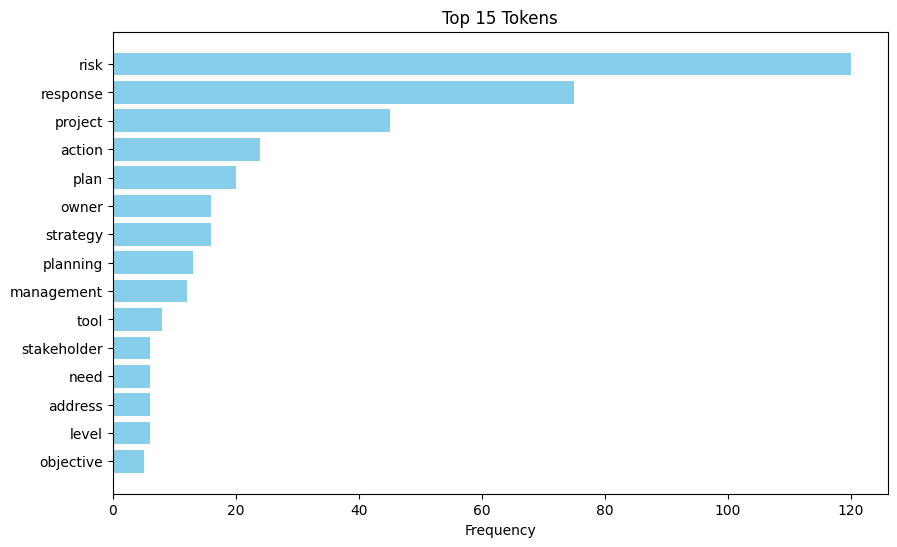

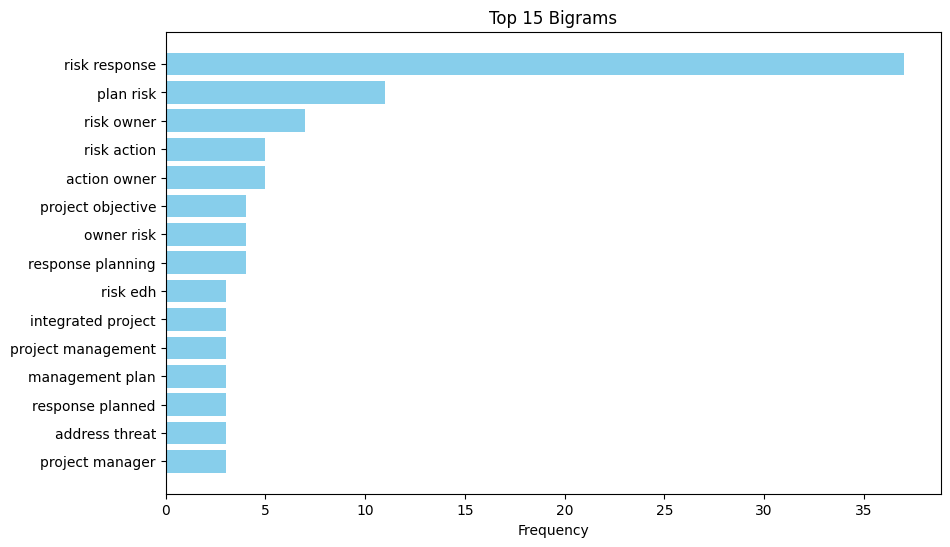

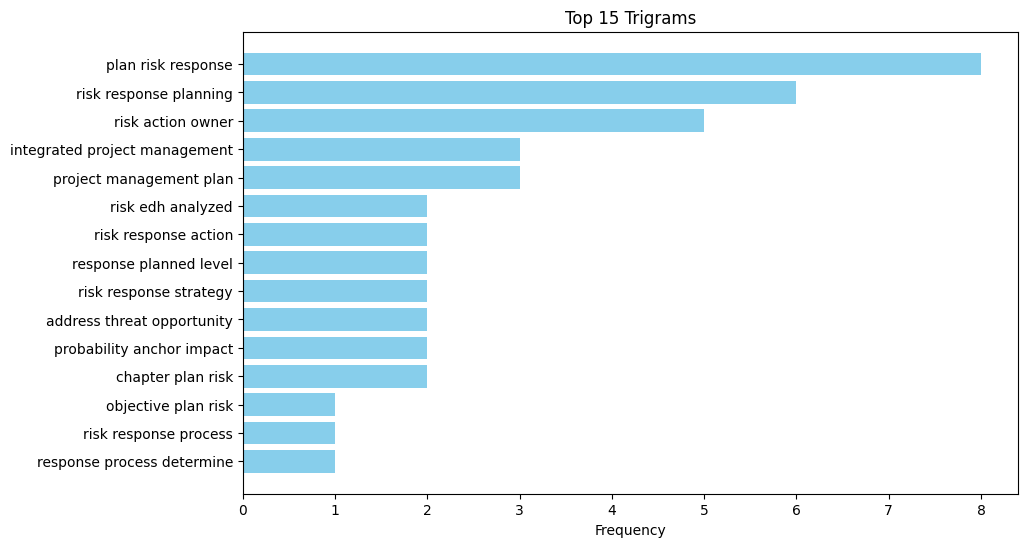

In [282]:
# Function to plot the n-grams frequencies
def plot_ngrams(ngrams, title, xlabel):
    terms, counts = zip(*ngrams)
    plt.figure(figsize=(10, 6))
    plt.barh(terms, counts, color='skyblue')
    plt.xlabel(xlabel)
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis to show highest frequency on top
    plt.show()

# Plot top tokens
plot_ngrams(top_tokens_list, 'Top 15 Tokens', 'Frequency')

# Plot top bigrams
plot_ngrams([(' '.join(bigram), freq) for bigram, freq in top_bigrams_list], 'Top 15 Bigrams', 'Frequency')

# Plot top trigrams
plot_ngrams([(' '.join(trigram), freq) for trigram, freq in top_trigrams_list], 'Top 15 Trigrams', 'Frequency')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\azizb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\azizb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


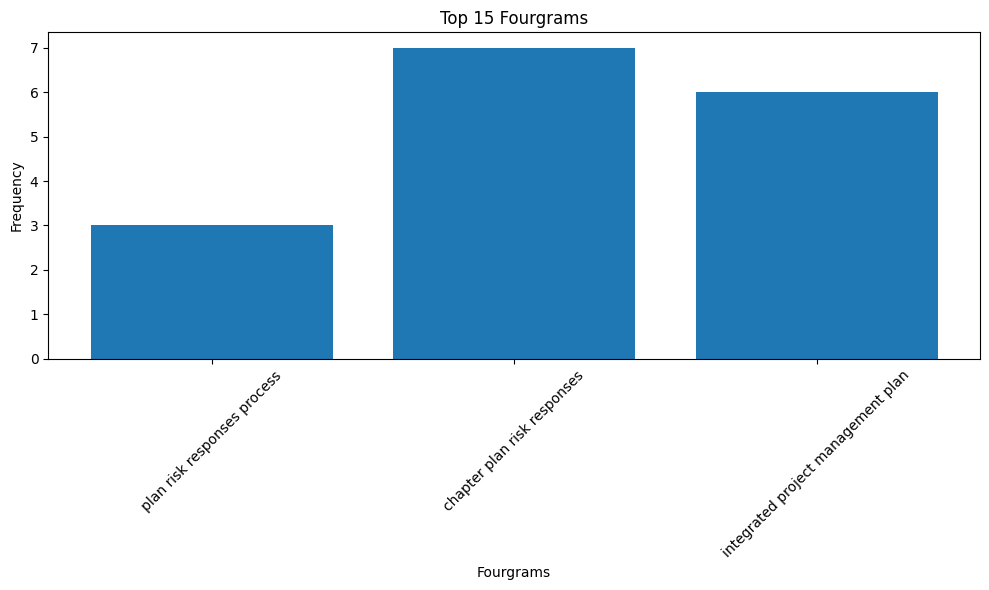

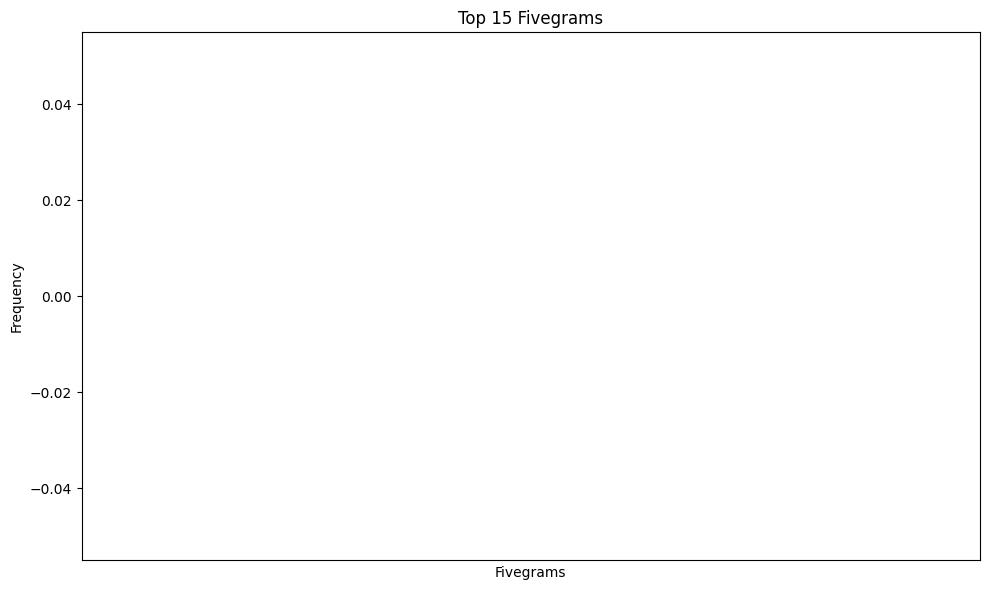

In [283]:
import nltk
from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Make sure to download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Function to extract n-grams from cleaned tokens
def extract_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Your DataFrame should be loaded here
# Assuming df['text_without_SW'] contains the text you want to analyze
all_tokens = []
all_fourgrams = Counter()
all_fivegrams = Counter()

# Tokenization of 'text_without_SW' column and extraction of n-grams
for text in df['text_without_SW']:
    tokens = nltk.word_tokenize(text)
    all_tokens.extend(tokens)
    
    # Extract n-grams
    fourgrams = extract_ngrams(tokens, 4)
    fivegrams = extract_ngrams(tokens, 5)
    
    # Update counters
    all_fourgrams.update(fourgrams)
    all_fivegrams.update(fivegrams)

# Filter n-grams that appear more than 6 times
filtered_fourgrams = {fourgram: freq for fourgram, freq in all_fourgrams.items() if freq > 2}
filtered_fivegrams = {fivegram: freq for fivegram, freq in all_fivegrams.items() if freq > 2}


# Visualization of Fourgrams
plt.figure(figsize=(10, 6))
plt.bar(range(len(filtered_fourgrams)), list(filtered_fourgrams.values()), align='center')
plt.xticks(range(len(filtered_fourgrams)), [' '.join(fourgram) for fourgram in filtered_fourgrams.keys()], rotation=45)
plt.title('Top 15 Fourgrams')
plt.xlabel('Fourgrams')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualization of Fivegrams
plt.figure(figsize=(10, 6))
plt.bar(range(len(filtered_fivegrams)), list(filtered_fivegrams.values()), align='center')
plt.xticks(range(len(filtered_fivegrams)), [' '.join(fivegram) for fivegram in filtered_fivegrams.keys()], rotation=45)
plt.title('Top 15 Fivegrams')
plt.xlabel('Fivegrams')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [284]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Mesures

### TF-IDF

In [285]:
combined_text = ' '.join(df['text_without_SW'])

# 2. Créer le vectoriseur TF-IDF
vectorizer = TfidfVectorizer()

# 3. Appliquer le vectoriseur à la chaîne concaténée
tfidf_matrix = vectorizer.fit_transform([combined_text])  # Notez les crochets autour de combined_text

# 4. Convertir en DataFrame pour une meilleure visualisation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Afficher les scores TF-IDF
print("TF-IDF Scores for the combined text:")
print(tfidf_df)

# Définir un seuil pour les termes importants
threshold = 0.1  # Ajustez ce seuil selon vos besoins

# Afficher uniquement les termes importants
print(f"\nTerms with TF-IDF scores greater than {threshold}:")
important_terms = {}
for j in range(len(vectorizer.get_feature_names_out())):
    if tfidf_df.iloc[0, j] > threshold:
        important_terms[vectorizer.get_feature_names_out()[j]] = tfidf_df.iloc[0, j]

# Afficher les termes importants
for term, score in important_terms.items():
    print(f"{term}: {score}")

TF-IDF Scores for the combined text:
    ability    accept  acceptance  accepted    access  accordance   account  \
0  0.007459  0.007459    0.014917  0.007459  0.007459    0.014917  0.007459   

     action   actions  activity  ...       use      used     using  validated  \
0  0.082044  0.119337  0.007459  ...  0.007459  0.022376  0.007459   0.007459   

     values    verify      view   warrant       way   whereas  
0  0.007459  0.007459  0.007459  0.007459  0.007459  0.007459  

[1 rows x 357 columns]

Terms with TF-IDF scores greater than 0.1:
actions: 0.11933654303226963
management: 0.1267950769717865
plan: 0.18646334848792132
planning: 0.1417121448508202
project: 0.35055109515729205
response: 0.2610486878830898
responses: 0.3132584254597078
risk: 0.6414339187984494
risks: 0.253590153943573


In [286]:
# with open('resultat final/results_chapt9.txt', 'w') as f:
#     f.write("Top 15 tokens:\n")
#     for token in top_tokens_list:
#         f.write(f"{token}\n")

#     f.write("\nTop 15 bigrams:\n")
#     for bigram in top_bigrams_list:
#         f.write(f"{bigram}\n")

#     f.write("\nTop 15 trigrams:\n")
#     for trigram in top_trigrams_list:
#         f.write(f"{trigram}\n")

#     f.write("\nTerms with TF-IDF scores greater than 0.1:\n")
#     for term, score in important_terms.items():
#         f.write(f"{term}: {score}\n")

# print("Results have been saved to 'results_chap9.txt'")

In [287]:
df.to_csv('Chapters csv/chapter_8.csv', index=True)

In [288]:
combined_text = ' '.join(df['text_without_SW'])

# 2. Créer le vectoriseur TF-IDF pour bigrams et trigrams
vectorizer = TfidfVectorizer(ngram_range=(2, 3))  # Ici, on extrait des bigrams et trigrams

# 3. Appliquer le vectoriseur à la chaîne concaténée
tfidf_matrix = vectorizer.fit_transform([combined_text])  # Notez les crochets autour de combined_text

# 4. Convertir en DataFrame pour une meilleure visualisation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Afficher les scores TF-IDF
print("TF-IDF Scores for Bigrams and Trigrams:")
print(tfidf_df)

# Définir un seuil pour afficher uniquement les termes importants
threshold = 0.1  # Ajustez ce seuil selon vos besoins

# Afficher uniquement les termes importants
important_terms = {}
for j in range(len(vectorizer.get_feature_names_out())):
    if tfidf_df.iloc[0, j] > threshold:
        important_terms[vectorizer.get_feature_names_out()[j]] = tfidf_df.iloc[0, j]

# Afficher les termes importants avec leurs scores
print("\nTerms with TF-IDF scores greater than threshold:")
for term, score in important_terms.items():
    print(f"{term}: {score}")

TF-IDF Scores for Bigrams and Trigrams:
   ability project  ability project team  accept needs  \
0         0.015627              0.015627      0.015627   

   accept needs authority  acceptance entails  acceptance entails taking  \
0                0.015627            0.015627                   0.015627   

   acceptance stakeholders  acceptance stakeholders addition  \
0                 0.015627                          0.015627   

   accepted proposed  accepted proposed risk  ...  verify responsibilities  \
0           0.015627                0.015627  ...                 0.015627   

   verify responsibilities manage  view proposed  view proposed responses  \
0                        0.015627       0.015627                 0.015627   

   warrant response  warrant response planned  way risks  way risks edh  \
0          0.015627                  0.015627   0.015627       0.015627   

   whereas risk  whereas risk action  
0      0.015627             0.015627  

[1 rows x 1799 colu

In [289]:
with open('resultat final/results_chapt8.txt', 'w') as f:
    # Écriture des tokens
    f.write("Top 15 tokens:\n")
    for token in top_tokens_list:
        f.write(f"{token}\n")

    # Écriture des bigrams
    f.write("\nTop 15 bigrams:\n")
    for bigram in top_bigrams_list:
        f.write(f"{bigram}\n")

    # Écriture des trigrams
    f.write("\nTop 15 trigrams:\n")
    for trigram in top_trigrams_list:
        f.write(f"{trigram}\n")


    # Écriture des termes avec les scores TF-IDF pour bigrams et trigrams
    f.write("\nTerms with TF-IDF scores greater than 0.1 (bigrams & trigrams):\n")
    for term, score in important_terms.items():
        f.write(f"{term}: {score}\n")

print("Results have been saved to 'results_chap8.txt'")


Results have been saved to 'results_chap8.txt'


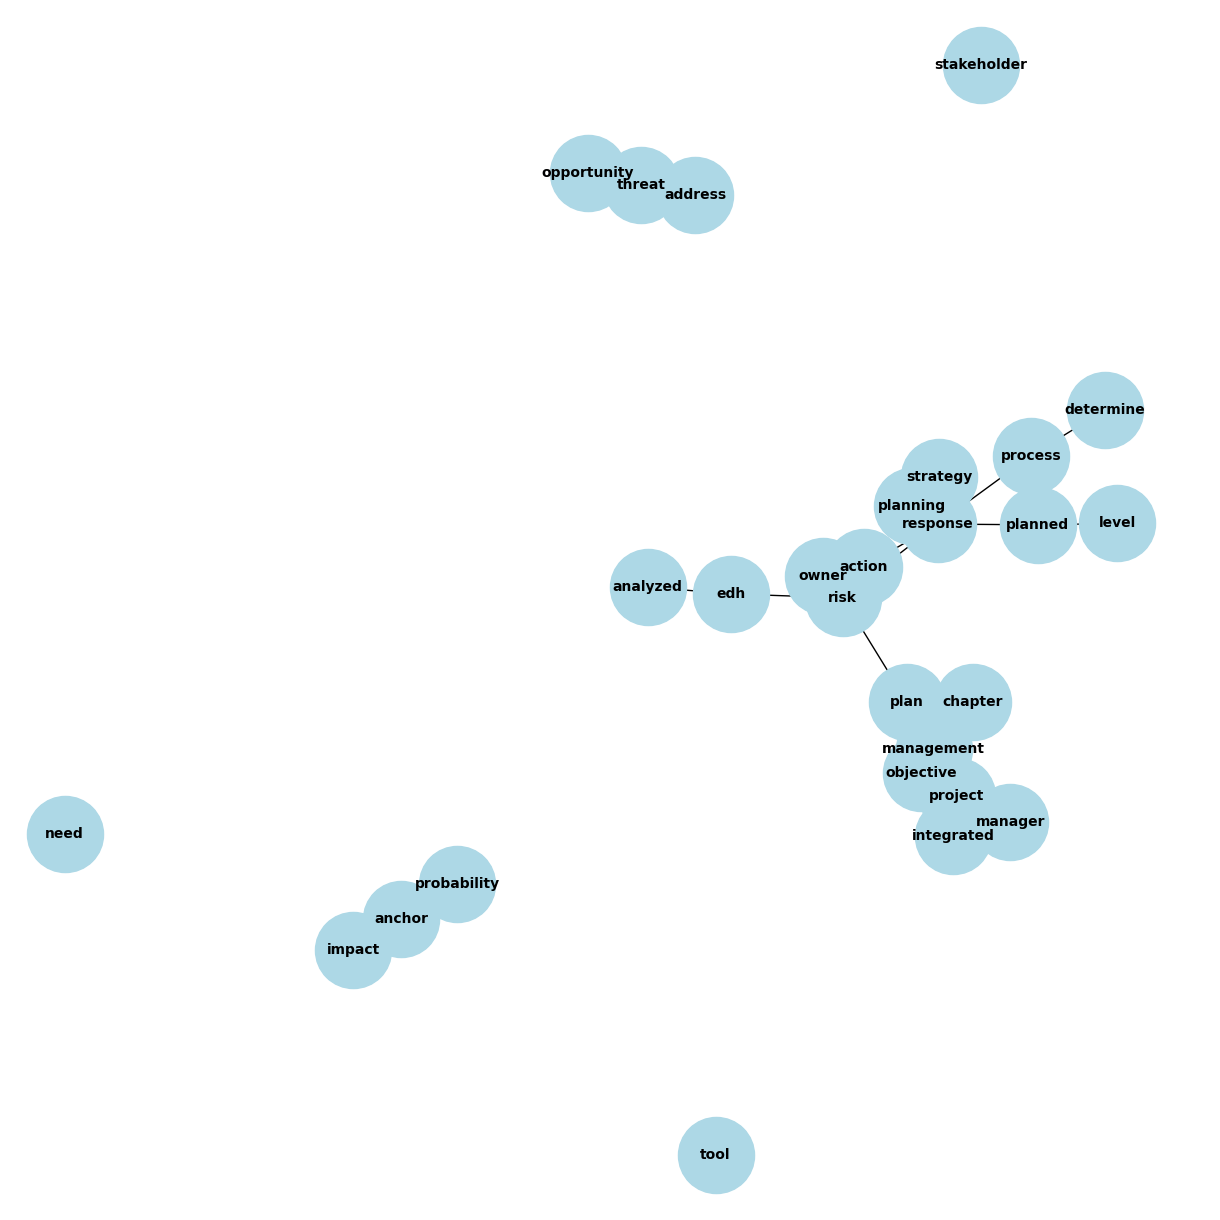

In [290]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialisation du graphe
G = nx.Graph()

# Ensemble pour stocker les nœuds uniques
unique_tokens = set()

# Ajouter des nœuds à partir des tokens
for token, freq in top_tokens_list:
    unique_tokens.add(token)

# Ajouter des nœuds à partir des bigrams
for bigram, freq in top_bigrams_list:
    unique_tokens.update(bigram)  # Ajouter les deux mots du bigram dans l'ensemble

# Ajouter des nœuds à partir des trigrams
for trigram, freq in top_trigrams_list:
    unique_tokens.update(trigram)  # Ajouter les trois mots du trigram dans l'ensemble

# Ajouter les nœuds uniques au graphe
G.add_nodes_from(unique_tokens)

# Ajouter des arêtes (relations basées sur les bigrams)
for bigram, freq in top_bigrams_list:
    G.add_edge(bigram[0], bigram[1], weight=freq)

# Ajouter des arêtes (relations basées sur les trigrams)
for trigram, freq in top_trigrams_list:
    G.add_edge(trigram[0], trigram[1], weight=freq)  # Relier le 1er au 2e mot
    G.add_edge(trigram[1], trigram[2], weight=freq)  # Relier le 2e au 3e mot

# Dessiner le graphe
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
plt.show()


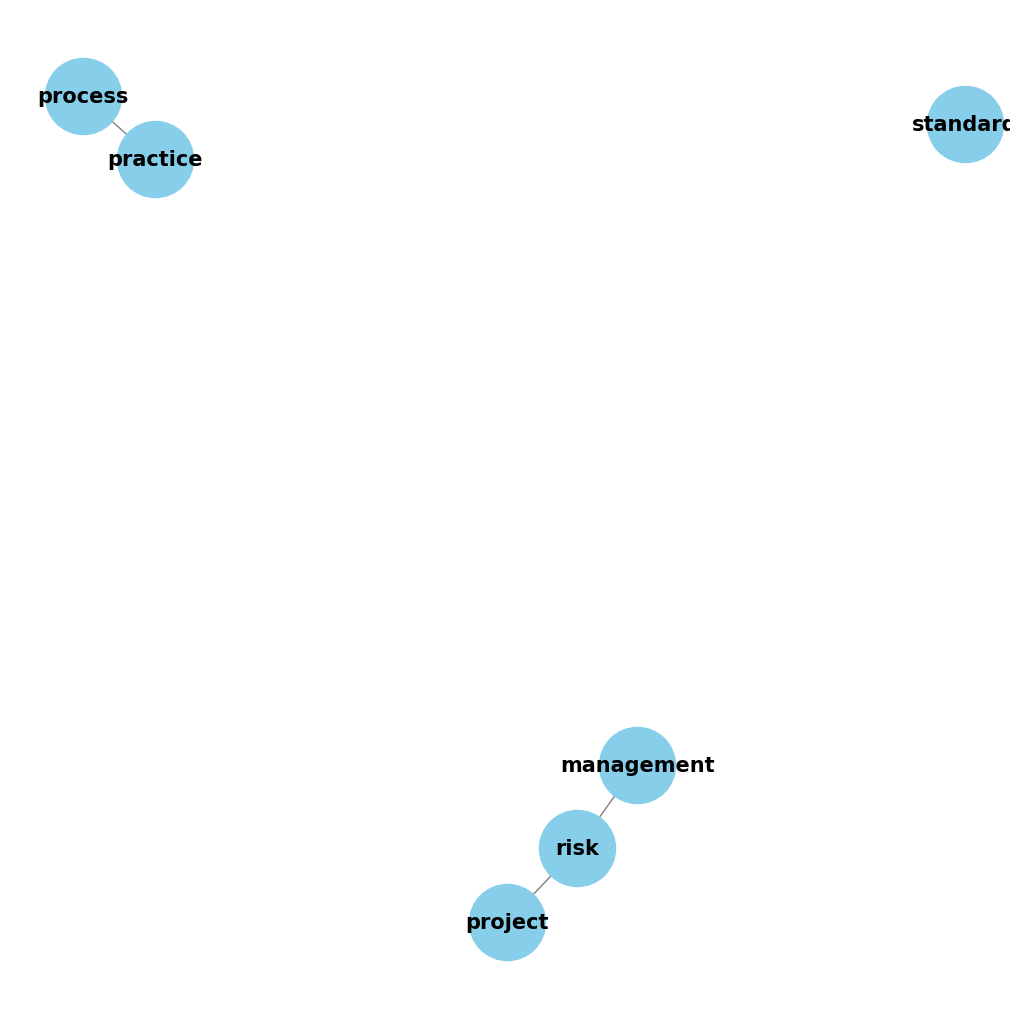

In [118]:
import networkx as nx
import matplotlib.pyplot as plt

# Créer un graphe vide
G = nx.Graph()

# Ajouter les nœuds (tokens, bigrams, trigrams)
tokens = ["project", "risk", "management", "process", "practice", "standard"]
bigrams = [("project", "risk"), ("risk", "management"), ("process", "practice")]

# Ajouter des nœuds au graphe
G.add_nodes_from(tokens)

# Ajouter des relations (edges) entre les nœuds selon la cooccurrence
G.add_edges_from(bigrams)

# Visualisation du graphe avec Matplotlib
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=3000, font_size=15, font_weight='bold', edge_color='gray')
plt.show()
